In [1]:
import os
os.getcwd()

'/Users/lexinyi/Desktop/Southern ridges competition submit/Model Code'

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stoxx_data = pd.read_csv("../../southern ridges competition/stoxx_till_2018.csv")
stoxx_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,2974.860107,3017.800049,2974.860107,3017.800049,3017.800049,0
1,2010-01-05,3016.639893,3025.600098,3006.469971,3012.360107,3012.360107,0
2,2010-01-06,3010.889893,3016.830078,2997.050049,3009.659912,3009.659912,0
3,2010-01-07,3000.139893,3013.899902,2979.800049,3007.340088,3007.340088,0
4,2010-01-08,3012.969971,3024.580078,2993.729980,3017.850098,3017.850098,0
...,...,...,...,...,...,...,...
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600


Here we construct mean reversion factor, this is a negative factor.

In [5]:
price_change = (stoxx_data["Close"]-stoxx_data["Close"].shift(1))
stoxx_data["price_change"] = price_change
stoxx_data.loc[0, "price_change"] = 0
price_change = price_change[1: ]
print(price_change)
stoxx_data.tail()

1       -5.439942
2       -2.700195
3       -2.319824
4       10.510010
5       -7.610108
          ...    
2256    11.250000
2257   -51.319824
2258     0.550048
2259   -63.250000
2260    49.169922
Name: Close, Length: 2260, dtype: float64


,Date,Open,High,Low,Close,Adj Close,Volume,price_change
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922


In [6]:
price_change_factor = stoxx_data["price_change"]
max_price_change, min_price_change = np.max(price_change_factor), np.min(price_change_factor)
price_change_normal = (price_change_factor - min_price_change)/(max_price_change - min_price_change)
stoxx_data["price_ch_normal"] = price_change_normal
stoxx_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000,0.524554
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824,0.404339
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048,0.503996
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000,0.381417
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922,0.597410


Here we construct RSI factor, this is a positive factor.

In [7]:
def add_n_days_RSI(dataframe, n):
    res = [0] * n
    for i in range(n, dataframe.shape[0]):
        price_change = dataframe.loc[i-n+1: i+1, "price_change"]
        price_change_pos = price_change[price_change >= 0]
        price_change_neg = np.abs(price_change[price_change < 0])
        RSI = 100 * np.mean(price_change_pos) / (np.mean(price_change_pos) + np.mean(price_change_neg))
        res.append(RSI)
#     max_res, min_res = np.max(res), np.mean(res)
    max_res, min_res = np.max(res), np.min(res)
    res_normal = (res - min_res)/(max_res - min_res)
    dataframe[str(n)+"_days_RSI"] = res_normal
    print("add " + str(n) + " days RSI successful!")
add_n_days_RSI(stoxx_data, 10)

add 10 days RSI successful!


Here we construct range factor, this is a positive factor.

In [8]:
def add_n_days_range(dataframe, n):
    res = [0] * (n - 1)
    for i in range(n - 1, dataframe.shape[0]):
        close_data = dataframe.loc[i-n+1: i+1, "Close"]
        high_data = dataframe.loc[i-n+1: i+1, "High"]
        low_data = dataframe.loc[i-n+1: i+1, "Low"]
        HH = np.max(high_data)
        LC = np.min(close_data)
        HC = np.max(close_data)
        LL = np.min(low_data)
        range_factor = np.max([HH-LC, HC-LL])
        res.append(range_factor)
#     max_res, min_res = np.max(res), np.mean(res)
    max_res, min_res = np.max(res), np.min(res)
    res_normal = (res - min_res)/(max_res - min_res)
    dataframe[str(n)+"_days_range"] = res_normal
    print("successfully add range to dataframe!!")
add_n_days_range(stoxx_data, 10)

successfully add range to dataframe!!


Here we construct positive volatility minus negative volatility factor, this is a positive factor.

In [9]:
def add_n_days_vol(dataframe, n):
    res = [0] * n
    for i in range(n, dataframe.shape[0]):
        data_return = dataframe.loc[i-n+1: i+1, "price_change"]
        return_pos = data_return[data_return >= 0]
        return_neg = data_return[data_return < 0]
        pos_vol = np.std(return_pos)
        neg_vol = np.std(return_neg)
        res.append(pos_vol - neg_vol)
#     max_res, min_res = np.max(res), np.mean(res)
    max_res, min_res = np.max(res), np.min(res)
    res_normal = (res - min_res)/(max_res - min_res)
    dataframe[str(n)+"_days_vol"] = res_normal
    print("add " + str(n) + " days vol successful!")
add_n_days_vol(stoxx_data, 10)

add 10 days vol successful!


Here we construct close minus MA factor, this is a negative factor.

In [10]:
def add_n_days_ma(dataframe, n):
    res = [0] * (n - 1)
    close = dataframe["Close"]
    for i in range(n - 1, dataframe.shape[0]):
        close_data = dataframe.loc[i-n+1: i+1, "Close"]
        res.append(np.mean(close_data))
    res_new = close - res
#     max_res, min_res = np.max(res_new), np.mean(res_new)
    max_res, min_res = np.max(res_new), np.min(res_new)
    res_normal = (-1)*(res_new - min_res)/(max_res - min_res)
    dataframe[str(n)+"_days_ma"] = res_normal
    print("successfully add ma to dataframe!!")
add_n_days_ma(stoxx_data, 10)

successfully add ma to dataframe!!


In [11]:
stoxx_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal,10_days_RSI,10_days_range,10_days_vol,10_days_ma
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000,0.524554,0.366580,0.199194,0.469336,-0.095793
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824,0.404339,0.398354,0.220311,0.586743,-0.081685
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048,0.503996,0.380815,0.289934,0.571185,-0.085142
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000,0.381417,0.434497,0.289934,0.567732,-0.067064
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922,0.597410,0.409311,0.289934,0.576177,-0.082197


In [12]:
factor_combined = (stoxx_data["10_days_RSI"] + stoxx_data["price_ch_normal"] + 
                   stoxx_data["10_days_range"] + stoxx_data["10_days_vol"] +
                   stoxx_data["10_days_ma"]) 
                
stoxx_data["factor_combined"] = factor_combined

In [13]:
factor_combined_linear = (23.8 * stoxx_data["10_days_RSI"] + 57.1 * stoxx_data["10_days_vol"] +
                          27.2 * stoxx_data["10_days_ma"])
                
stoxx_data["factor_combined_linear"] = factor_combined_linear

In [14]:
factor_combined

0       0.041131
1       0.032305
2       0.038376
3       0.039801
4       0.061309
          ...   
2256    1.463871
2257    1.528061
2258    1.660790
2259    1.606516
2260    1.790634
Length: 2261, dtype: float64

In [15]:
stoxx_data["portfolio value"] = [1000000] * len(stoxx_data.index)
stoxx_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal,10_days_RSI,10_days_range,10_days_vol,10_days_ma,factor_combined,factor_combined_linear,portfolio value
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000,0.524554,0.366580,0.199194,0.469336,-0.095793,1.463871,32.918117,1000000
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824,0.404339,0.398354,0.220311,0.586743,-0.081685,1.528061,40.762001,1000000
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048,0.503996,0.380815,0.289934,0.571185,-0.085142,1.660790,39.362228,1000000
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000,0.381417,0.434497,0.289934,0.567732,-0.067064,1.606516,40.934374,1000000
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922,0.597410,0.409311,0.289934,0.576177,-0.082197,1.790634,40.405508,1000000


In [16]:
profit_list = [0] * 9
for i in range(9, len(stoxx_data.index)-1):
    close = stoxx_data.loc[i, "Close"]
    price_change = stoxx_data.loc[i, "price_change"]
    portfolio_value = stoxx_data.loc[i, "portfolio value"]
    price_change_before = stoxx_data.loc[i-1, "price_change"]
    
    RSI = stoxx_data.loc[i, "10_days_RSI"]
    factor_combined = stoxx_data.loc[i, "factor_combined"]
    factor_combined_linear = stoxx_data.loc[i, "factor_combined_linear"]
    
    close_next_day = stoxx_data.loc[i+1, "Close"]

#     if factor_combined_linear > 40:
#     if True:
    if factor_combined > 1.7:
        #这里我们用80%的现金去买指数
        buy_value = 0.8 * portfolio_value
        buy_amount = int(buy_value/close)
        remain_value = portfolio_value - buy_amount * close
        new_portfolio_value = remain_value + buy_amount * close_next_day
        stoxx_data.loc[i+1, "portfolio value"] = new_portfolio_value
        profit_list.append(new_portfolio_value - portfolio_value)
    else:
        stoxx_data.loc[i+1, "portfolio value"] = portfolio_value
        profit_list.append(0)

print("successfully running the loops!")

profit_list = profit_list + [0]
stoxx_data["profit"] = profit_list
print("successfully add profit list!")

successfully running the loops!
successfully add profit list!


In [17]:
stoxx_data[["Date", "factor_combined", "portfolio value", "profit"]].tail()

,Date,factor_combined,portfolio value,profit
2256,2018-12-19,1.463871,6.628240e+06,0.0
2257,2018-12-20,1.528061,6.628240e+06,0.0
2258,2018-12-21,1.660790,6.628240e+06,0.0
2259,2018-12-27,1.606516,6.628240e+06,0.0
2260,2018-12-28,1.790634,6.628240e+06,0.0


In [18]:
portfolio_value_series = stoxx_data["portfolio value"]
annual_return = 100 * ((portfolio_value_series[portfolio_value_series.index[-1]] / portfolio_value_series[portfolio_value_series.index[0]]) ** (1/9) - 1 )
annual_return

23.38616597937586

In [19]:
dates = {0: "2010-01-04", 1: "2010-12-30", 2: "2011-12-30", 3: "2012-12-28", 4: "2013-12-30",
         5: "2014-12-30", 6: "2015-12-30", 7: "2016-12-30", 8: "2017-12-29", 9: "2018-12-28"}
return_list = []
for i in range(1, 10):
    first_day_data = stoxx_data[stoxx_data["Date"] == dates[i-1]]
    last_day_data = stoxx_data[stoxx_data["Date"] == dates[i]]
    return_list.append((last_day_data["portfolio value"].values[0]/first_day_data["portfolio value"].values[0] - 1))
return_volatility = np.std(return_list) * 100
sharpe_ratio = (annual_return - 2)/return_volatility
sharpe_ratio

1.9304831431462082

In [20]:
print("Annualized return is: ", annual_return, "%")
print("------------------------------------------")
print("Sharpe Ratio is: ", sharpe_ratio)

Annualized return is:  23.38616597937586 %
------------------------------------------
Sharpe Ratio is:  1.9304831431462082


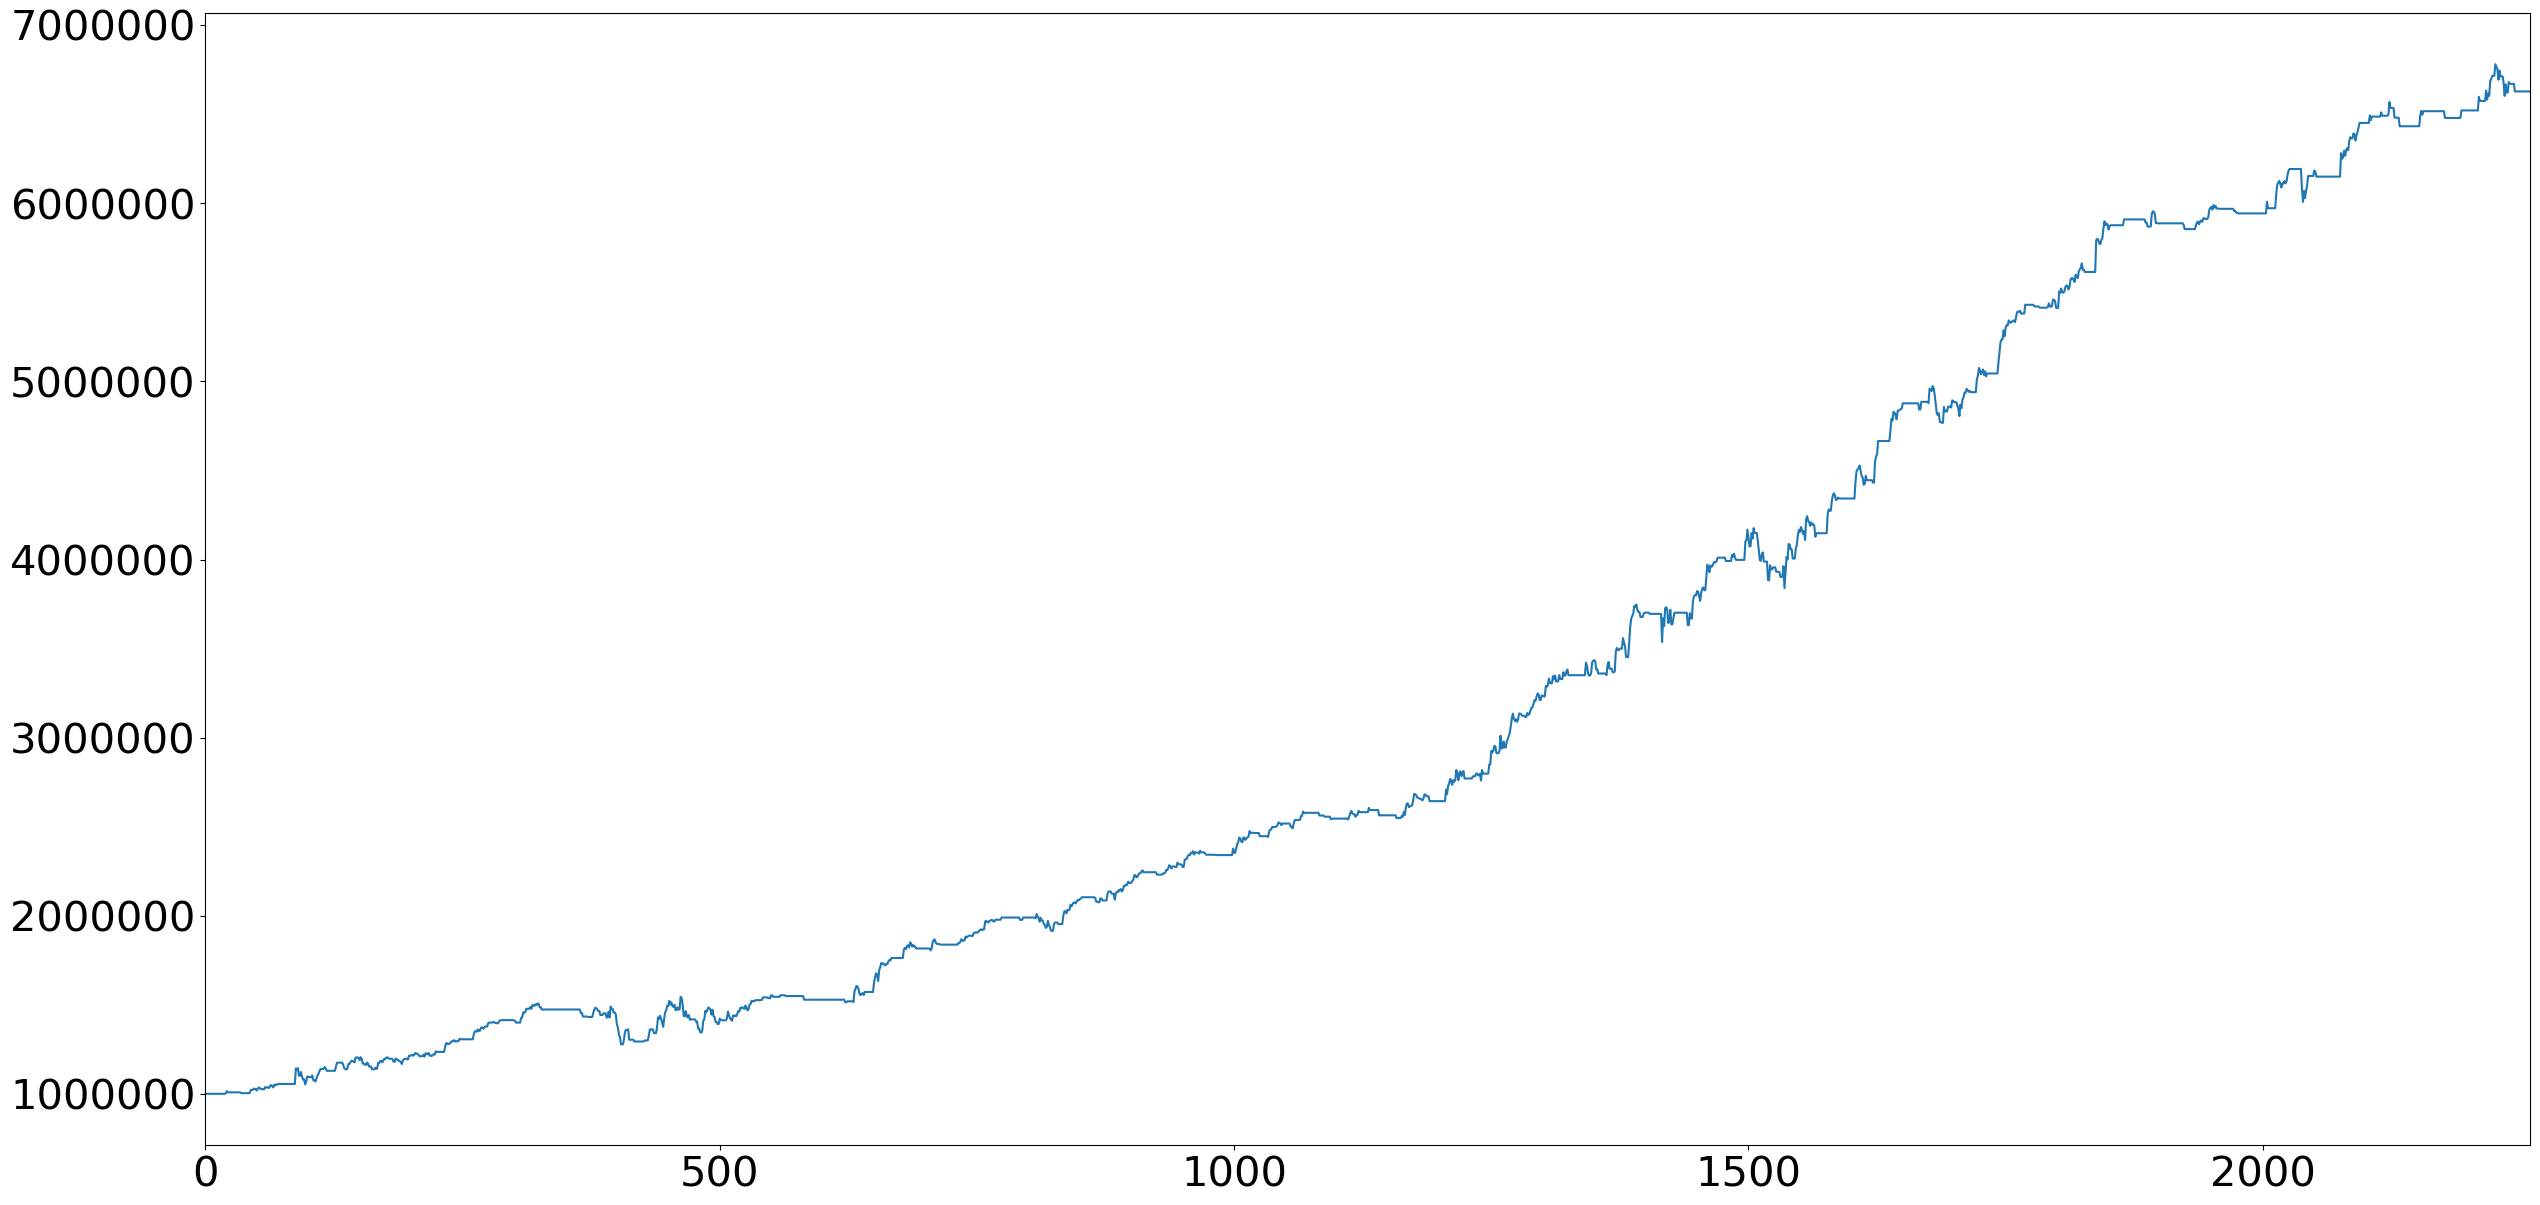

In [21]:
plt.figure(figsize=(30, 15), dpi=100)
stoxx_data["portfolio value"].plot()
plt.tick_params(labelsize=30)
plt.show()

In [22]:
stoxx_data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal,10_days_RSI,10_days_range,10_days_vol,10_days_ma,factor_combined,factor_combined_linear,portfolio value,profit
2251,2018-12-12,3059.250000,3119.199951,3059.250000,3107.969971,3107.969971,47486300,52.649903,0.604096,0.401659,0.324874,0.435946,-0.094937,1.671638,31.869725,6.628240e+06,0.0
2252,2018-12-13,3110.570068,3128.100098,3100.110107,3112.169922,3112.169922,45330100,4.199951,0.511009,0.462326,0.324874,0.444080,-0.098408,1.643881,33.683638,6.628240e+06,0.0
2253,2018-12-14,3102.090088,3103.169922,3063.229980,3092.600098,3092.600098,34270600,-19.569824,0.465340,0.432900,0.324874,0.470887,-0.095534,1.598468,34.592168,6.628240e+06,0.0
2254,2018-12-17,3088.969971,3092.820068,3053.560059,3063.649902,3063.649902,36582200,-28.950196,0.447318,0.423279,0.275756,0.486260,-0.091632,1.540981,35.347124,6.628240e+06,0.0
2255,2018-12-18,3054.010010,3067.540039,3040.129883,3040.129883,3040.129883,43622700,-23.520019,0.457751,0.377897,0.234675,0.469970,-0.088348,1.451944,33.426142,6.628240e+06,0.0
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000,0.524554,0.366580,0.199194,0.469336,-0.095793,1.463871,32.918117,6.628240e+06,0.0
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824,0.404339,0.398354,0.220311,0.586743,-0.081685,1.528061,40.762001,6.628240e+06,0.0
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048,0.503996,0.380815,0.289934,0.571185,-0.085142,1.660790,39.362228,6.628240e+06,0.0
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000,0.381417,0.434497,0.289934,0.567732,-0.067064,1.606516,40.934374,6.628240e+06,0.0
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922,0.597410,0.409311,0.289934,0.576177,-0.082197,1.790634,40.405508,6.628240e+06,0.0


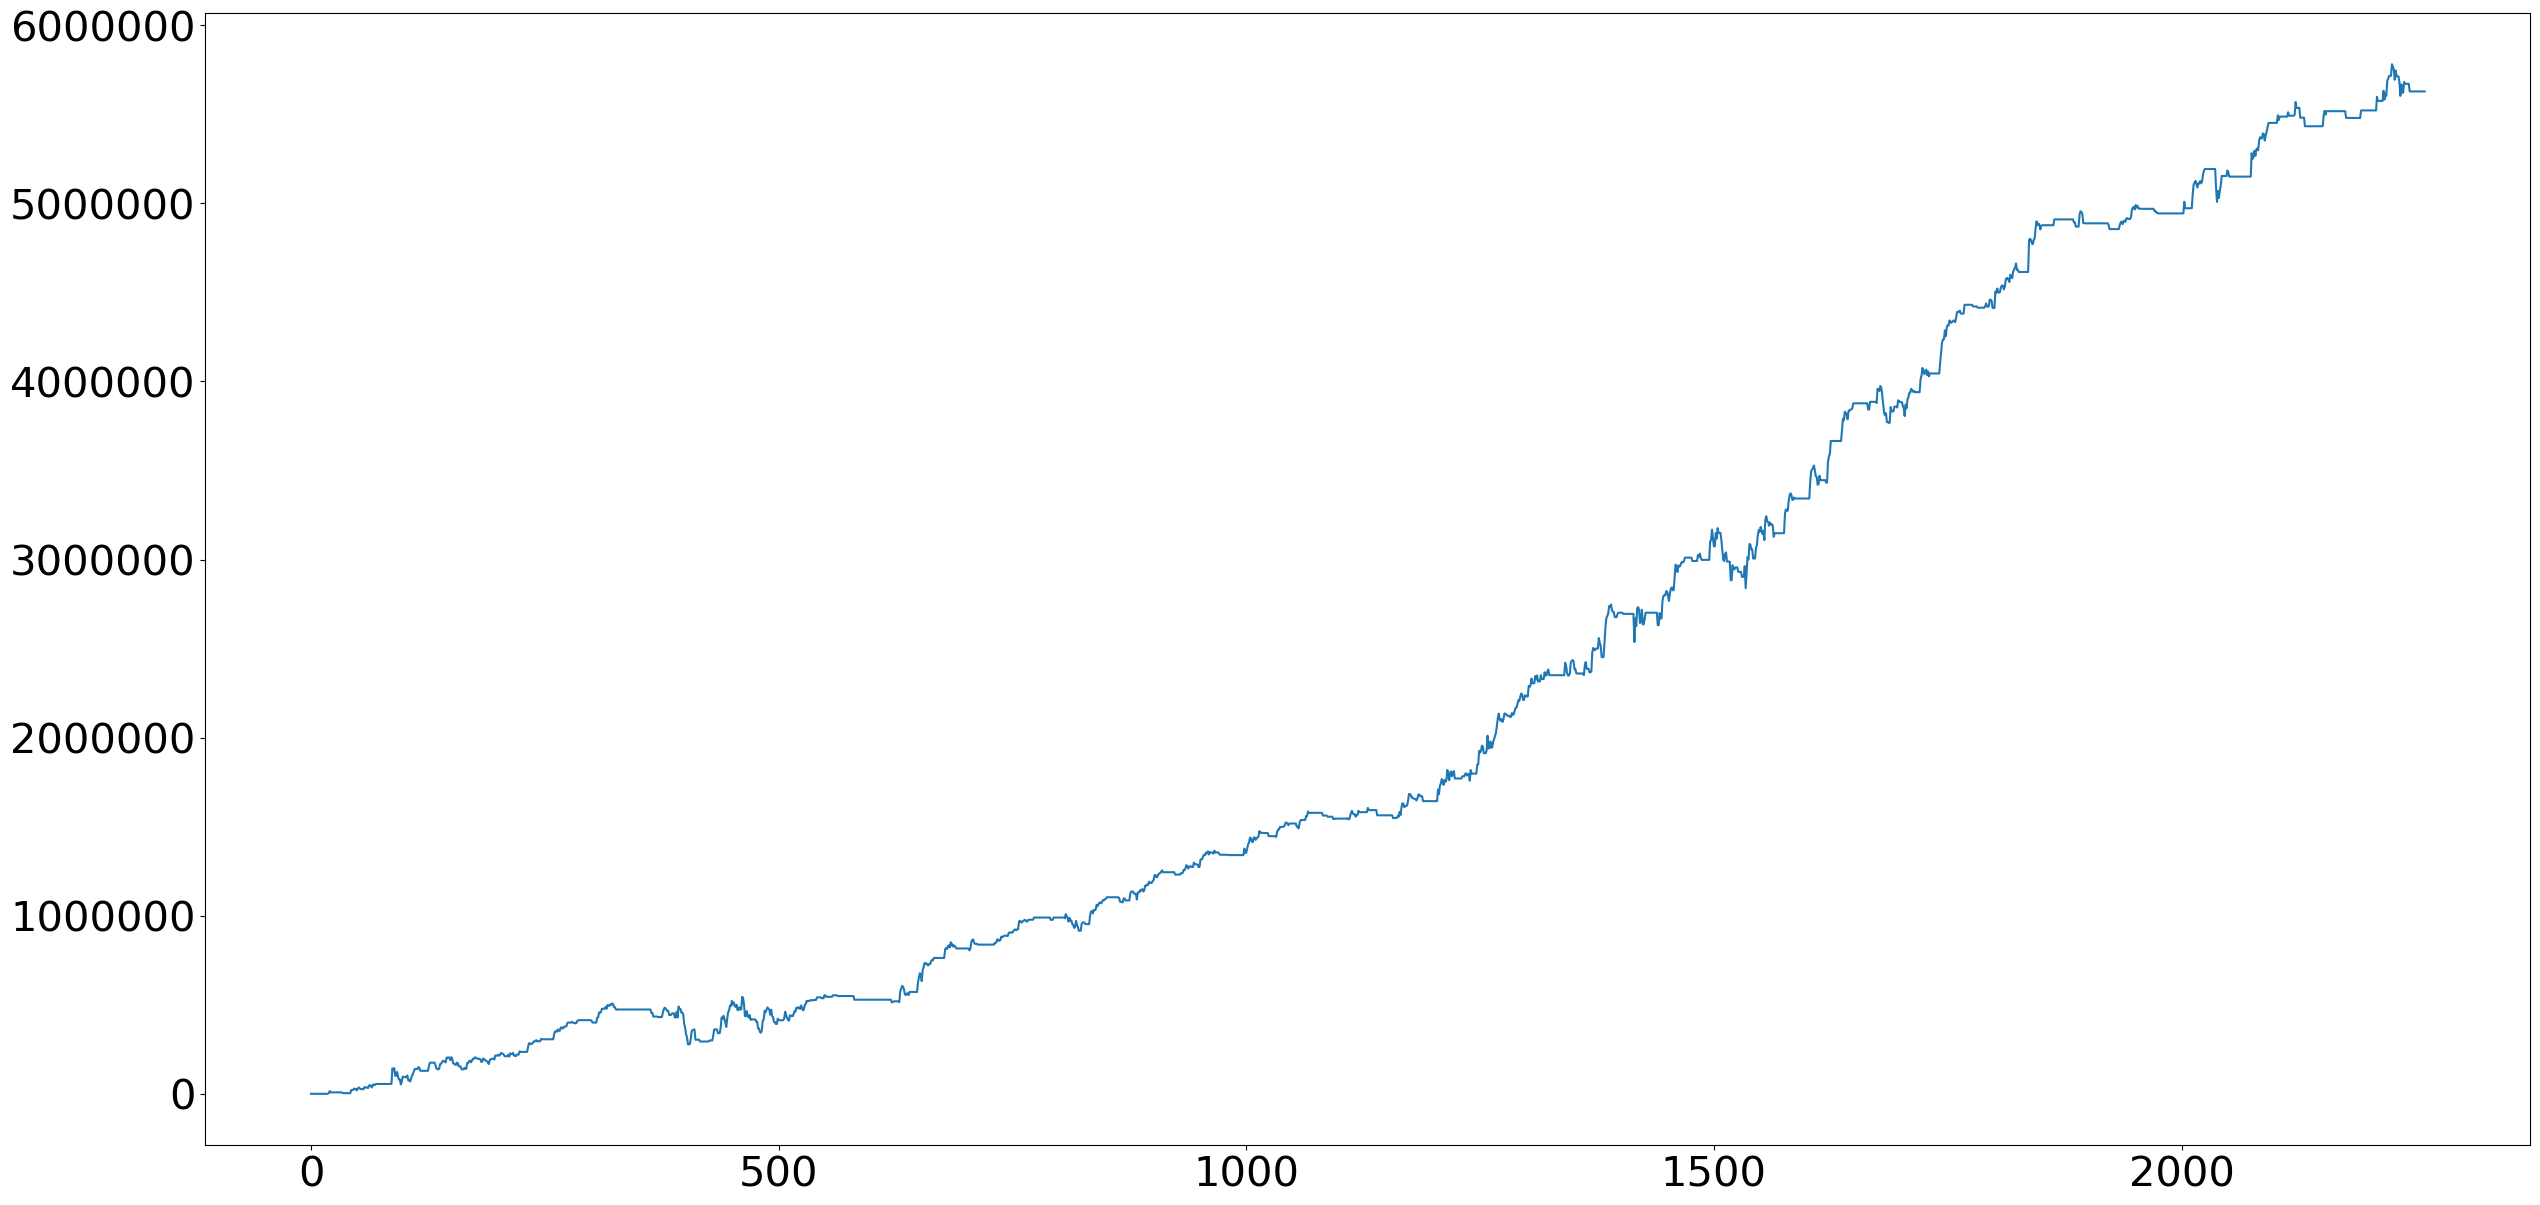

In [23]:
cum_profit = [stoxx_data.loc[0, "profit"]]
for i in range(1, len(stoxx_data)):
    cum_profit.append(cum_profit[i-1] + stoxx_data.loc[i, "profit"])

plt.figure(figsize=(30, 15), dpi=100)
plt.tick_params(labelsize=30)
plt.plot(cum_profit)
plt.show()

In [64]:
profit, price_change = stoxx_data["profit"], stoxx_data["price_change"]
print("positive profit times: ", len(profit[profit >= 0]))
print("negative profit times: ", len(profit[profit < 0]))

positive profit times:  1730
negative profit times:  531


SpearmanrResult(correlation=0.13376038300207482, pvalue=1.7083931881419825e-10)
-----------------------------------------------------
count    2261.000000
mean        1.714680
std         0.245405
min        -0.010716
25%         1.566807
50%         1.699923
75%         1.856930
max         3.290409
Name: factor_combined, dtype: float64
-----------------------------------------------------


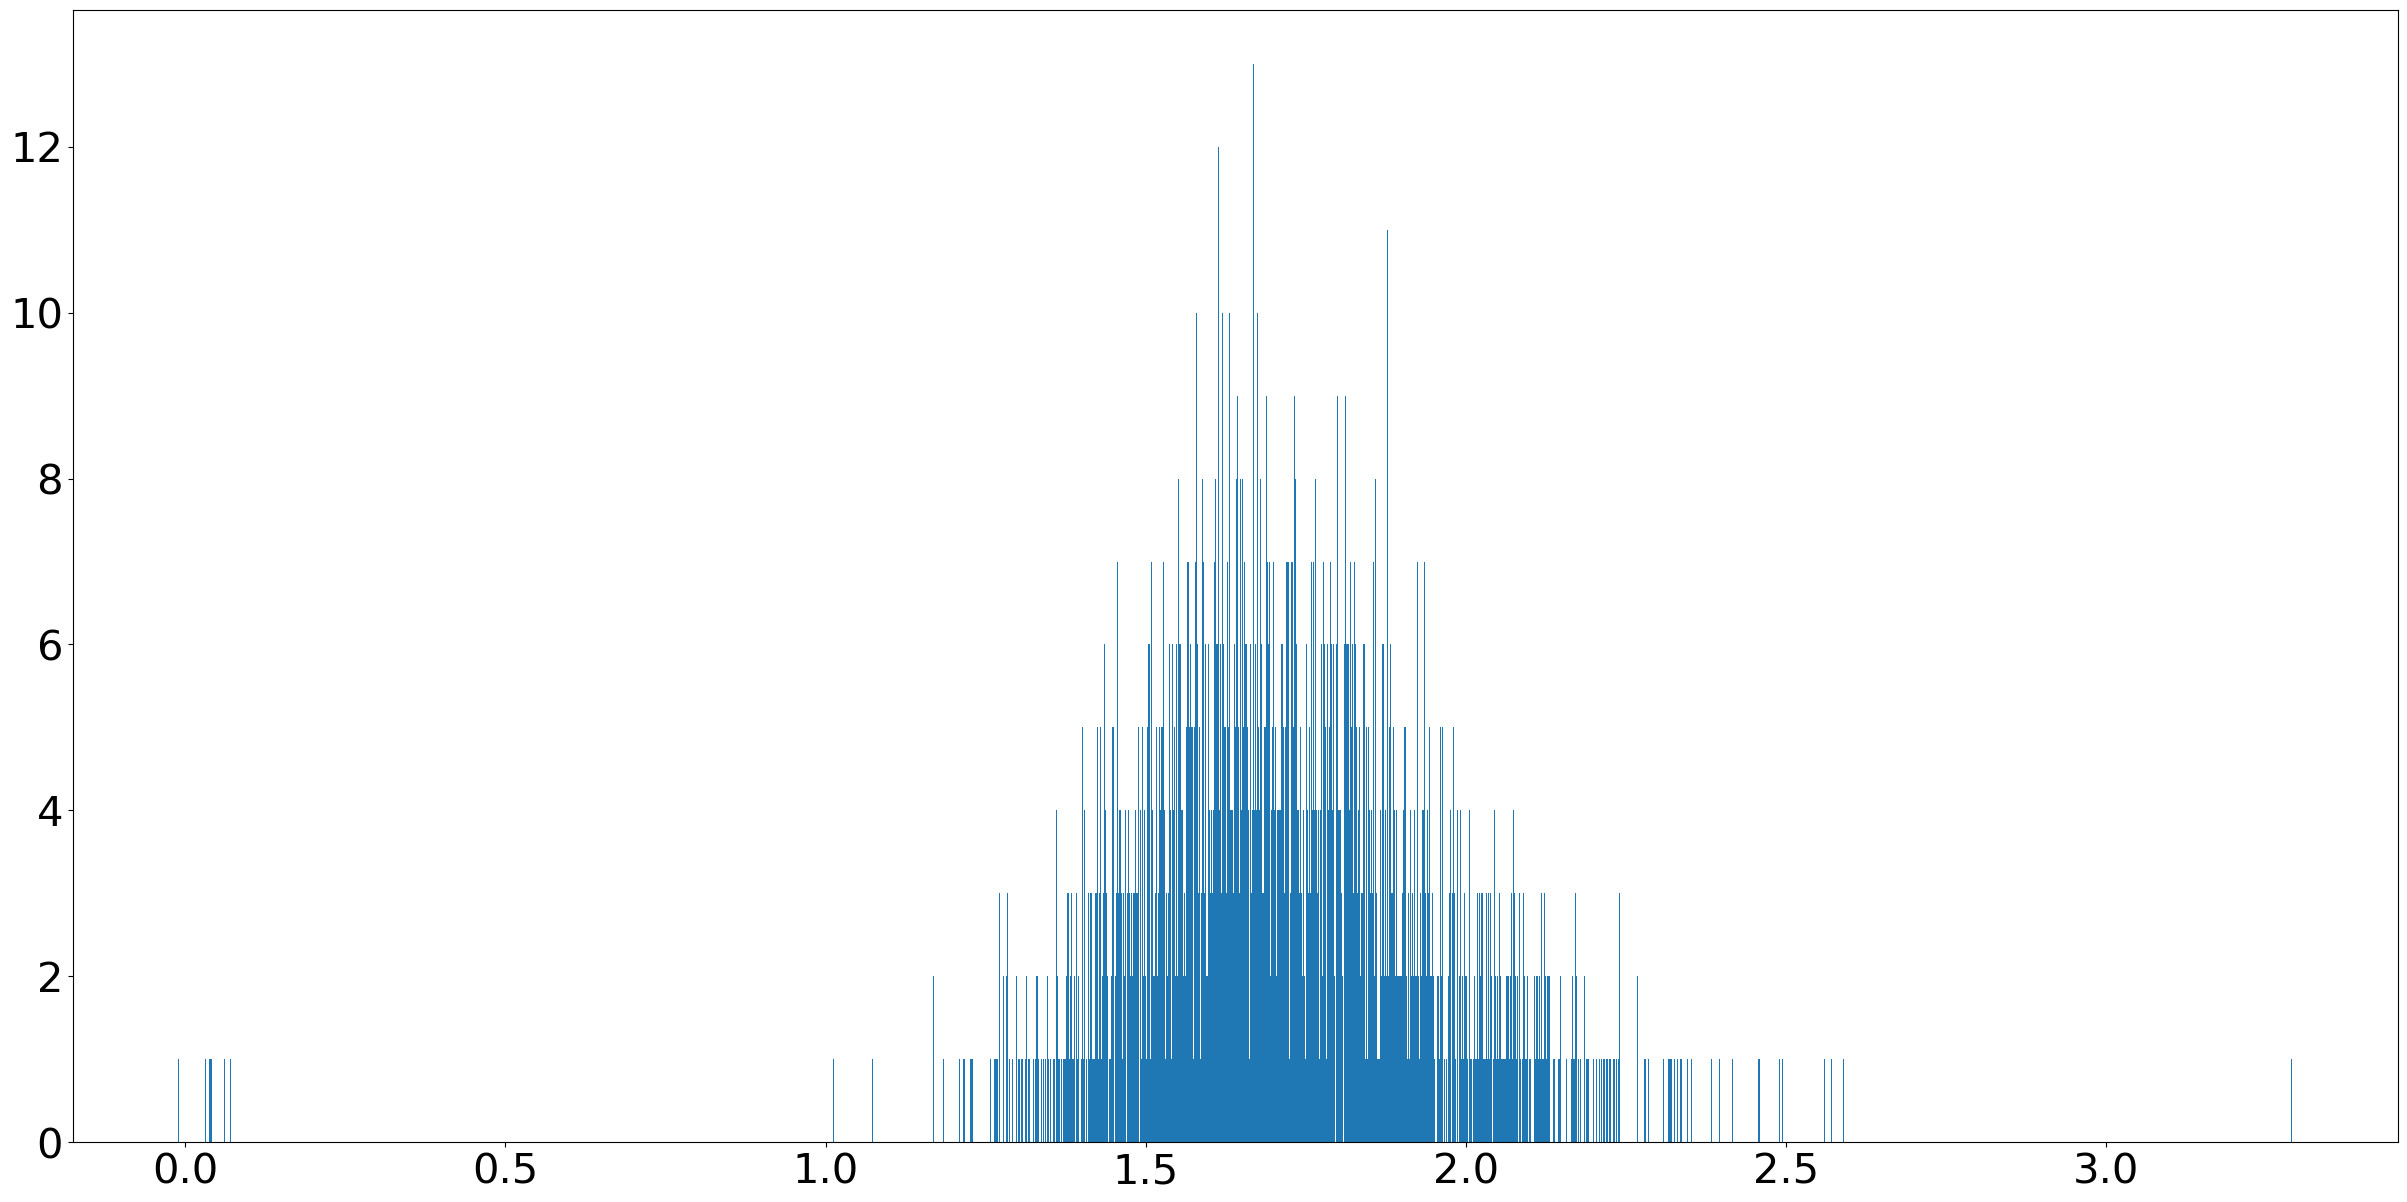

In [140]:
print(stats.spearmanr(stoxx_data[["factor_combined", "profit"]]))
print("-----------------------------------------------------")
print(stoxx_data["factor_combined"].describe())
print("-----------------------------------------------------")
plt.figure(figsize=(30, 15), dpi=100)
plt.tick_params(labelsize=30)
plt.hist(stoxx_data["factor_combined"], bins=2600)
plt.show()

In [141]:
group = []
for i in range(len(stoxx_data)):
    group.append(int(stoxx_data.loc[i, "factor_combined"] // 0.1))
stoxx_data["group"] = group
stoxx_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal,7_days_MOM,10_days_RSI,10_days_range,10_days_vol,10_days_ma,factor_combined,factor_combined_linear,portfolio value,profit,group
2256,2018-12-19,3042.189941,3063.699951,3042.189941,3051.379883,3051.379883,46652700,11.250000,0.524554,0.613015,0.366580,0.199194,0.469336,-0.095793,1.463871,32.918117,1.060947e+06,-14266.911072,14
2257,2018-12-20,3031.320068,3031.320068,2993.399902,3000.060059,3000.060059,57123500,-51.319824,0.404339,0.513273,0.398354,0.220311,0.586743,-0.081685,1.528061,40.762001,1.046680e+06,153.463392,15
2258,2018-12-21,2996.919922,3003.060059,2957.560059,3000.610107,3000.610107,84815000,0.550048,0.503996,0.455308,0.380815,0.289934,0.571185,-0.085142,1.660790,39.362228,1.046834e+06,-17646.750000,16
2259,2018-12-27,2987.669922,2997.239990,2908.699951,2937.360107,2937.360107,45597600,-63.250000,0.381417,0.380266,0.434497,0.289934,0.567732,-0.067064,1.606516,40.934374,1.029187e+06,13767.578160,16
2260,2018-12-28,2952.050049,2996.169922,2951.510010,2986.530029,2986.530029,32799300,49.169922,0.597410,0.456743,0.409311,0.289934,0.576177,-0.082197,1.790634,40.405508,1.042955e+06,0.000000,17


-1
count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: profit, dtype: float64


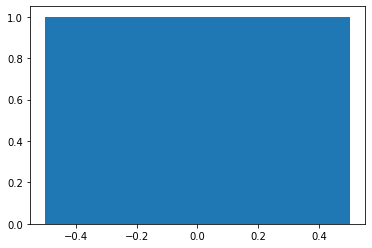

----------------------------
0
count    8.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: profit, dtype: float64


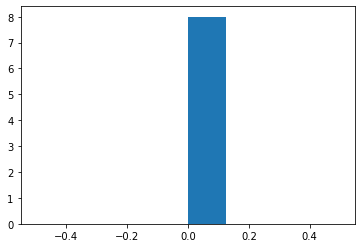

----------------------------
9
count        1.000000
mean    -22179.341454
std               NaN
min     -22179.341454
25%     -22179.341454
50%     -22179.341454
75%     -22179.341454
max     -22179.341454
Name: profit, dtype: float64


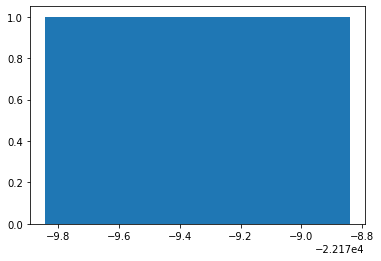

----------------------------
10
count       2.000000
mean     2967.546972
std      2581.116319
min      1142.422120
25%      2054.984546
50%      2967.546972
75%      3880.109398
max      4792.671824
Name: profit, dtype: float64


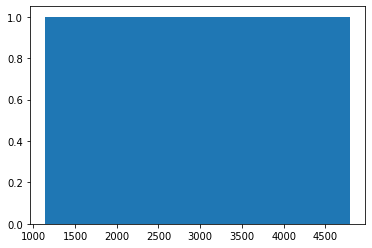

----------------------------
11
count       3.000000
mean     1353.577553
std      5922.156104
min     -4498.626287
25%     -1641.279169
50%      1216.067949
75%      4279.679474
max      7343.290998
Name: profit, dtype: float64


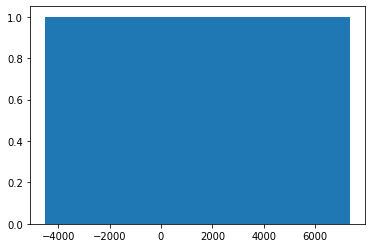

----------------------------
12
count       29.000000
mean     -1066.125879
std      10883.109005
min     -26000.517270
25%      -5838.027440
50%        428.201138
75%       5026.554832
max      22561.184112
Name: profit, dtype: float64


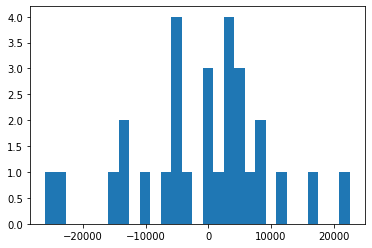

----------------------------
13
count       84.000000
mean     -3641.153248
std      12525.642880
min     -72510.295263
25%      -9456.377521
50%         89.118116
75%       3136.651565
max      20729.822820
Name: profit, dtype: float64


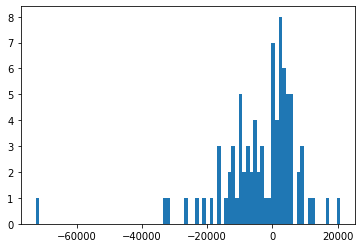

----------------------------
14
count      228.000000
mean     -3032.610884
std       9706.207629
min     -33711.032656
25%      -8524.129600
50%       -749.704200
75%       4084.802563
max      14169.431320
Name: profit, dtype: float64


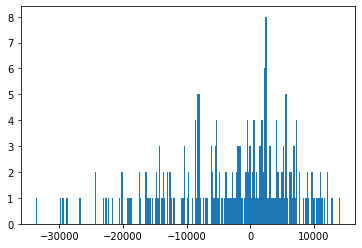

----------------------------
15
count      325.000000
mean     -1660.127043
std       9956.919812
min     -31227.693852
25%      -7924.778492
50%        -17.356762
75%       4877.004163
max      25894.271424
Name: profit, dtype: float64


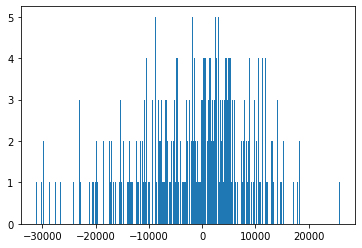

----------------------------
16
count      450.000000
mean      -671.385665
std       9553.087825
min     -40557.077190
25%      -5838.560217
50%        -82.033235
75%       5140.113953
max      25210.742740
Name: profit, dtype: float64


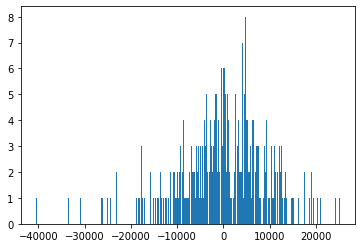

----------------------------
17
count      370.000000
mean       722.647284
std       8921.385529
min     -47292.671824
25%      -4432.908950
50%        535.846410
75%       5980.882198
max      26993.759134
Name: profit, dtype: float64


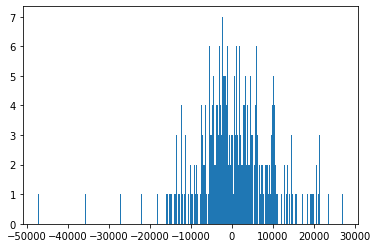

----------------------------
18
count      323.000000
mean      2166.156735
std       9653.524678
min     -35890.137426
25%      -2745.596547
50%        658.285152
75%       6898.224946
max      39233.012922
Name: profit, dtype: float64


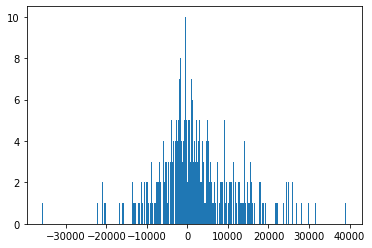

----------------------------
19
count      191.000000
mean      2230.388106
std       9090.639839
min     -25165.188048
25%      -2795.942677
50%       1344.152292
75%       6807.764082
max      32539.899714
Name: profit, dtype: float64


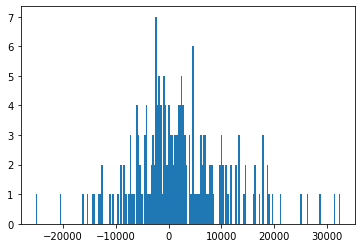

----------------------------
20
count      128.000000
mean      2190.543339
std      10395.712159
min     -35008.982496
25%      -3054.541863
50%       1334.093175
75%       7712.848308
max      37592.365092
Name: profit, dtype: float64


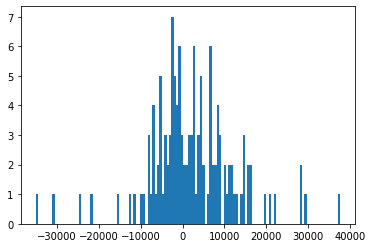

----------------------------
21
count       67.000000
mean      2487.268431
std      12875.580227
min     -25148.397150
25%      -3500.914024
50%        387.725800
75%       6038.304366
max      40713.780681
Name: profit, dtype: float64


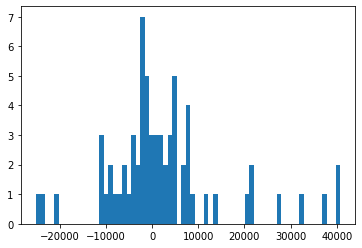

----------------------------
22
count       26.000000
mean      1829.272081
std      11337.308044
min     -22004.773616
25%      -3291.675772
50%        566.495065
75%       7443.577389
max      30043.663377
Name: profit, dtype: float64


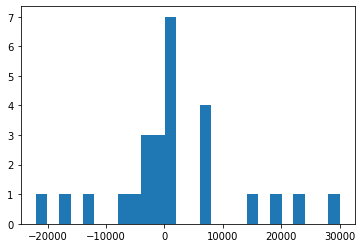

----------------------------
23
count       14.000000
mean       824.686271
std      10939.338688
min     -23990.380960
25%      -3552.617583
50%         72.358469
75%       4764.016406
max      26645.236830
Name: profit, dtype: float64


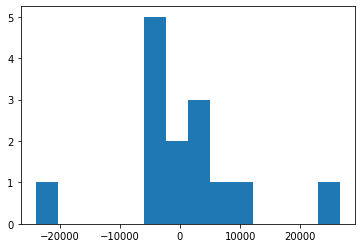

----------------------------
24
count        6.000000
mean        86.483971
std      13191.062074
min     -21808.204737
25%      -3321.237226
50%        350.174762
75%       6608.025368
max      17477.824694
Name: profit, dtype: float64


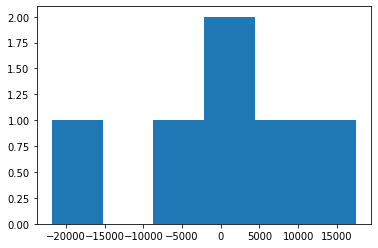

----------------------------
25
count        4.000000
mean      8284.868711
std      46759.194503
min     -35987.677812
25%     -18677.505595
50%      -1785.173193
75%      25177.201113
max      72697.499041
Name: profit, dtype: float64


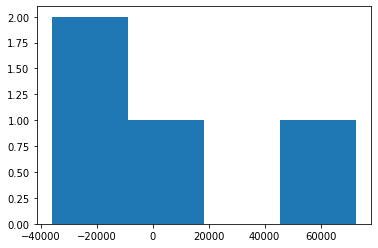

----------------------------
32
count       1.000000
mean    -7841.135988
std              NaN
min     -7841.135988
25%     -7841.135988
50%     -7841.135988
75%     -7841.135988
max     -7841.135988
Name: profit, dtype: float64


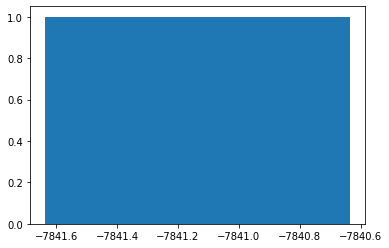

----------------------------


In [143]:
for name, group in stoxx_data["profit"].groupby(stoxx_data["group"]):
    print(name)
    print(group.describe())
    plt.hist(group, bins = len(group))
    plt.show()
    print("----------------------------")

In [67]:
stoxx_data.sort_values("factor_combined").tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,price_change,price_ch_normal,10_days_RSI,10_days_range,10_days_vol,10_days_ma,factor_combined,factor_combined_linear,portfolio value,profit,group
462,2011-10-27,2361.679932,2482.919922,2361.679932,2476.919922,2476.919922,0,141.859863,0.775495,0.727272,0.334079,0.722192,-0.134399,2.424639,54.890586,1.544907e+06,-7250.787870,24
1845,2017-05-04,3591.790039,3627.879883,3590.239990,3627.879883,3627.879883,52783900,41.629883,0.582923,0.852577,0.356793,0.782140,-0.117332,2.457101,61.760095,5.858890e+06,39905.011396,24
146,2010-08-02,2756.000000,2826.030029,2756.000000,2822.169922,2822.169922,0,80.030029,0.656702,0.878643,0.335832,0.710041,-0.123198,2.458019,58.104063,1.203668e+06,-1091.183291,24
1419,2015-08-27,3220.110107,3301.139893,3220.110107,3280.780029,3280.780029,65391700,110.050049,0.714379,0.512879,0.747727,0.600985,-0.085569,2.490402,44.195294,3.727041e+06,5275.533572,24
93,2010-05-18,2655.870117,2713.469971,2655.870117,2698.209961,2698.209961,0,62.869873,0.623732,0.560485,0.454658,0.963401,-0.107211,2.495065,65.433596,1.122545e+06,-26138.353692,24
1417,2015-08-25,3105.520020,3237.520020,3105.479980,3218.010010,3218.010010,103513400,144.620117,0.780799,0.467065,0.773732,0.593584,-0.055035,2.560145,43.512847,3.669575e+06,-43119.387360,25
89,2010-05-11,2728.310059,2733.139893,2671.659912,2730.479980,2730.479980,0,-28.409913,0.448356,0.724838,0.507310,0.979946,-0.098839,2.561611,70.517655,1.133034e+06,11197.756149,25
90,2010-05-12,2723.239990,2787.639893,2695.909912,2764.310059,2764.310059,0,33.830079,0.567937,0.682507,0.507310,0.926022,-0.113153,2.570624,66.041771,1.144232e+06,-43159.135347,25
87,2010-05-07,2563.629883,2611.979980,2472.100098,2500.179932,2500.179932,0,-111.229980,0.289233,0.679051,0.676765,0.967493,-0.022094,2.590447,70.804289,1.055252e+06,87185.256857,25
88,2010-05-10,2534.810059,2758.889893,2531.429932,2758.889893,2758.889893,0,258.709961,1.000000,0.764407,0.631309,1.000000,-0.105308,3.290409,72.428523,1.142438e+06,-9403.681203,32


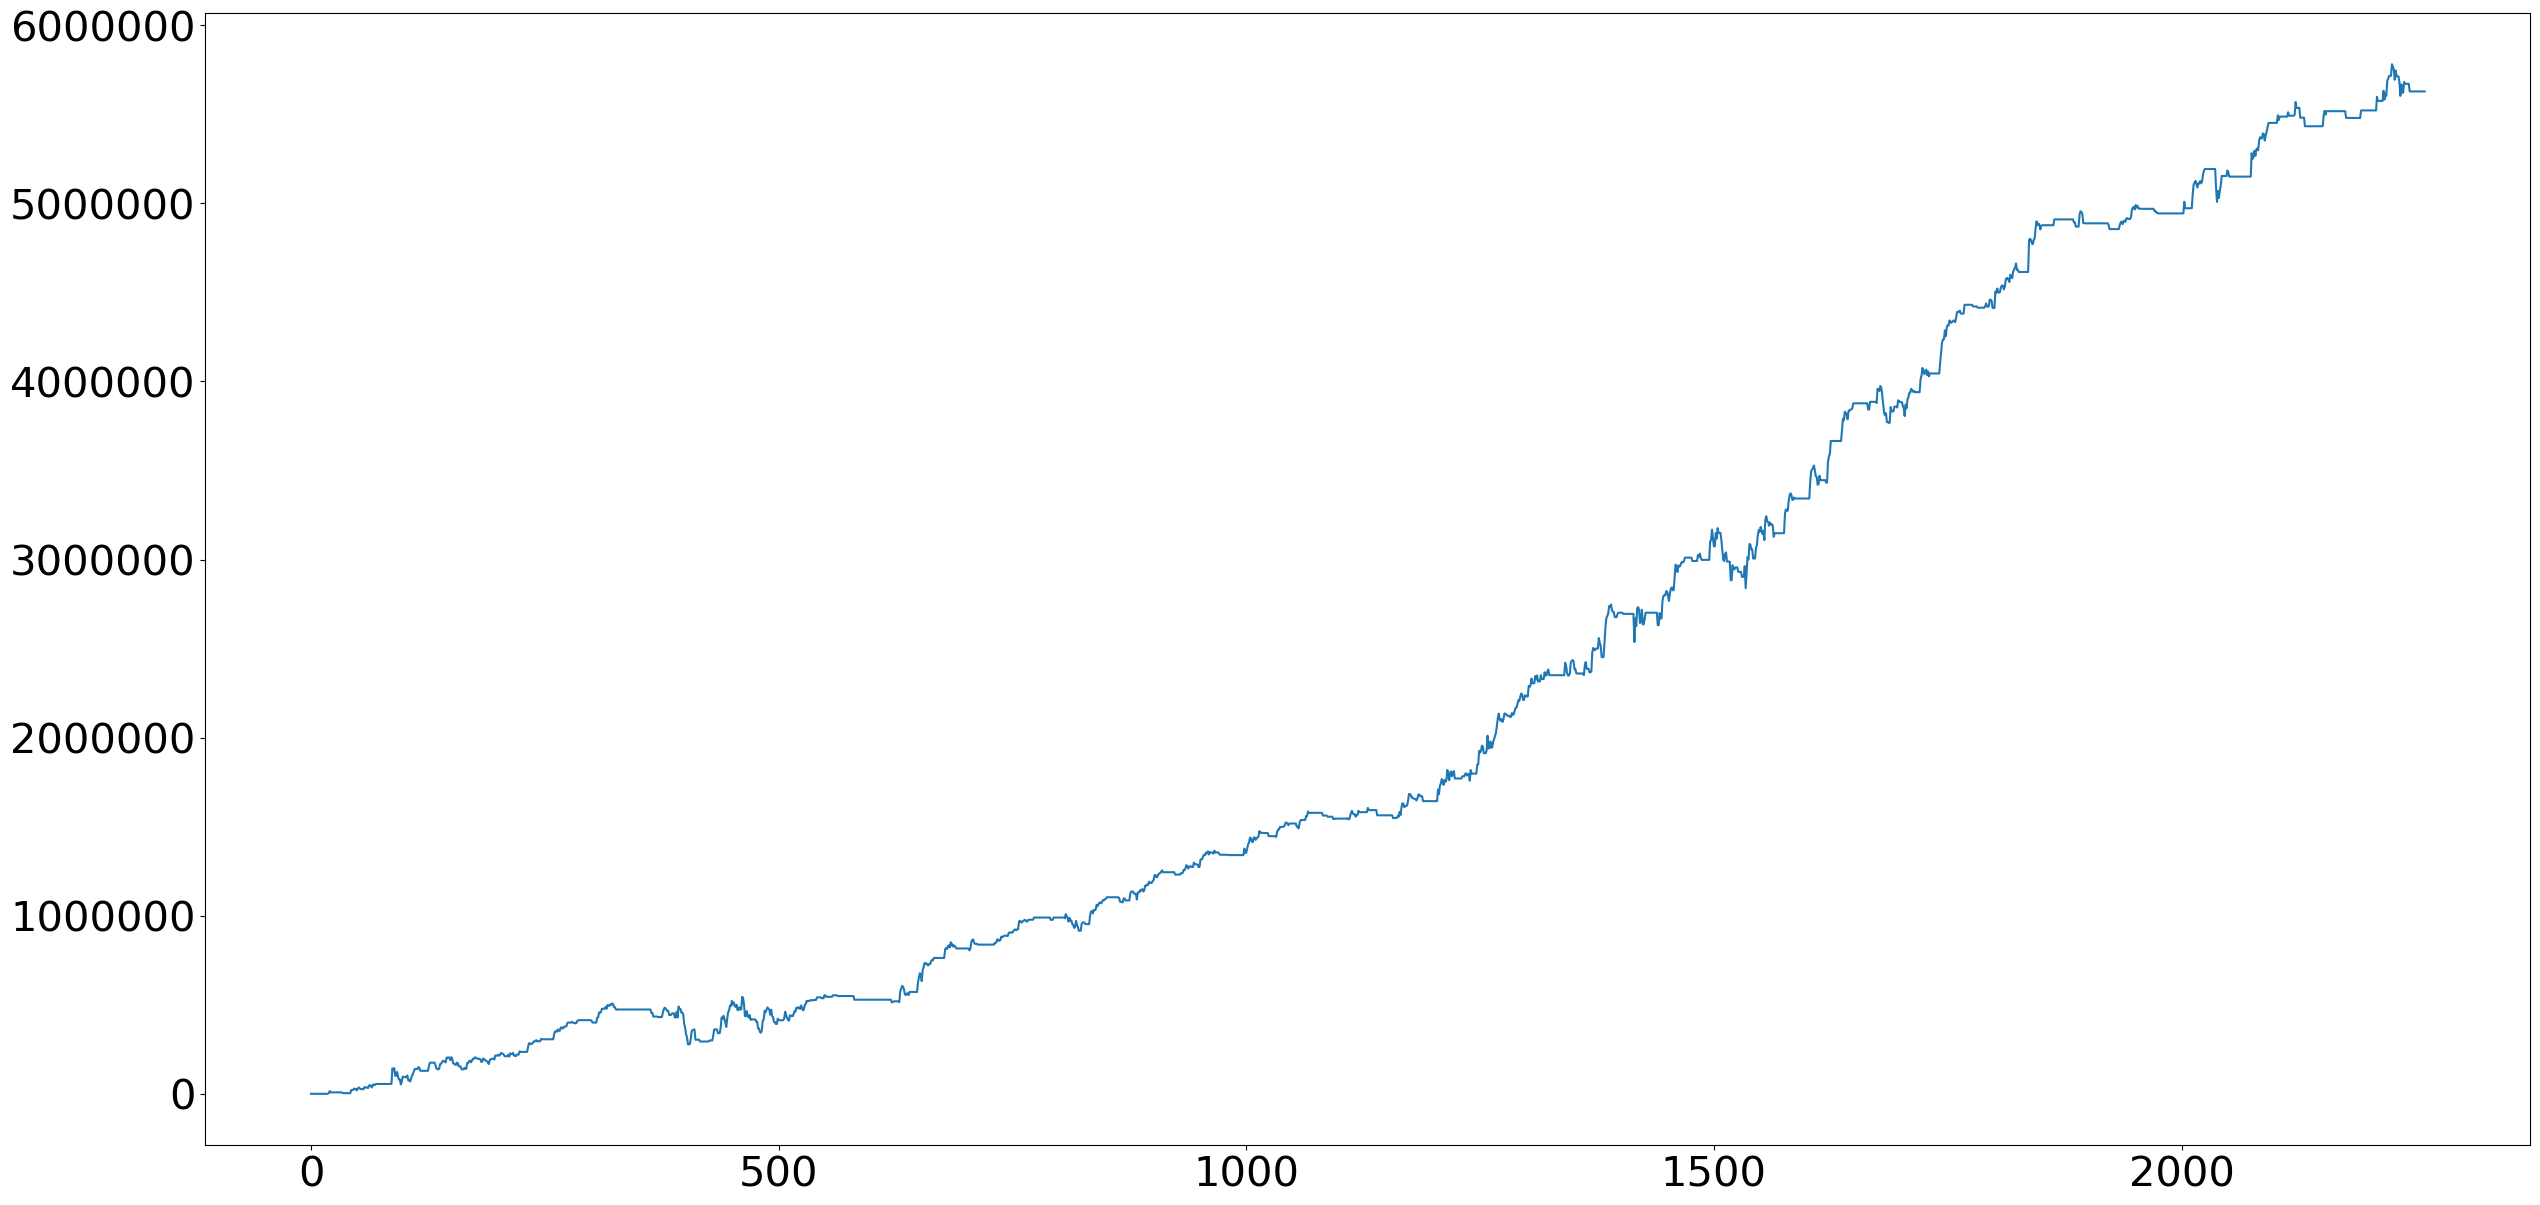

In [147]:
plt.figure(figsize=(30, 15), dpi=100)
plt.tick_params(labelsize=30)
plt.plot(cum_profit)
plt.show()